<a href="https://colab.research.google.com/github/guilhermelaviola/LautaroInterGoalsAnalysis/blob/main/CristianoRonaldoGoals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [5]:
# Importing and displaying the last 10 goals scored:
goals_scored = pd.ExcelFile('goals-scored.xlsx')
cr7 = pd.read_excel(goals_scored, 'cristiano-ronaldo')
cr7.tail(10)

,Competition,Round,Date,H/A,Club,Against,Score,Position,Minute,Which goal,How was it scored,Assist
730,Saudi Pro League,12,2023-11-04,H,Al-Nassr FC,Al-Khaleej FC,2–0,CF,26',01:00:00,Right-footed shot,Abdulrahman Ghareeb
731,Saudi Pro League,13,2023-11-11,A,Al-Nassr FC,Al-Wehda FC,1–3,CF,49',00:03:00,Right-footed shot,NaN
732,Saudi Pro League,14,2023-11-24,H,Al-Nassr FC,Al-Okhdood Club,3–0,CF,77',02:00:00,Right-footed shot,NaN
733,Saudi Pro League,14,2023-11-24,H,Al-Nassr FC,Al-Okhdood Club,3–0,CF,80',03:00:00,Right-footed shot,NaN
734,Saudi Pro League,16,2023-12-08,H,Al-Nassr FC,Al-Riyadh SC,4–1,CF,31',01:00:00,Right-footed shot,Sadio Mané
735,King's Cup,Quarter-Finals,2023-12-11,A,Al-Nassr FC,Al-Shabab FC,2–5,CF,74',01:04:00,Right-footed shot,Otávio
736,Saudi Pro League,18,2023-12-22,H,Al-Nassr FC,Al-Ettifaq FC,3–1,CF,73',03:00:00,Penalty,NaN
737,Saudi Pro League,17,2023-12-26,A,Al-Nassr FC,Al-Ittihad Club,2–5,CF,19',01:01:00,Penalty,NaN
738,Saudi Pro League,17,2023-12-26,A,Al-Nassr FC,Al-Ittihad Club,2–5,CF,68',02:03:00,Penalty,NaN
739,Saudi Pro League,19,2023-12-30,A,Al-Nassr FC,Al-Taawoun FC,1–4,CF,90'+2,01:04:00,Header,Seko Fofana


I extracted this data from Transfermarkt.

In [6]:
# Displaying the number of rows and columns in the dataset:
cr7.shape

(740, 12)

In [7]:
cr7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Competition        740 non-null    object        
 1   Round              740 non-null    object        
 2   Date               740 non-null    datetime64[ns]
 3   H/A                740 non-null    object        
 4   Club               740 non-null    object        
 5   Against            740 non-null    object        
 6   Score              740 non-null    object        
 7   Position           740 non-null    object        
 8   Minute             740 non-null    object        
 9   Which goal         740 non-null    object        
 10  How was it scored  737 non-null    object        
 11  Assist             479 non-null    object        
dtypes: datetime64[ns](1), object(11)
memory usage: 69.5+ KB


As you can see above, the dataset has 740 rows at moment (03/02/2024). Each row represents a goal Cristiano scored. And there are 12 columns:
1. Competition
2. Round
3. Date
4. H/A - Home or Away
5. Club
6. Against
7. Final Score
8. Position
9. Minute
10. Which goal
11. How was it scored
12. Assist



In [8]:
# Renaming the table columns:
cr7.columns = ['Competition', 'Round', 'Date',
              'Home or away', 'Club',
              'Against who', 'Score',
              'Position', 'Minute',
              'Which goal', 'How was it scored',
              'Assist']

In [9]:
# Displaying the dataset after the columns were renamed:
cr7.head()

,Competition,Round,Date,Home or away,Club,Against who,Score,Position,Minute,Which goal,How was it scored,Assist
0,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3–0,LW,34',2–0,Solo run,NaN
1,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3–0,LW,90'+5,3–0,Header,Rui Jorge
2,Liga Portugal,8,2002-10-26,A,Sporting CP,Boavista FC,1–2,RW,88',1–2,Right-footed shot,Carlos Martins
3,Taça de Portugal,Fourth Round,2002-11-24,H,Sporting CP,CD Estarreja,4–1,RW,67',3–1,Left-footed shot,César Prates
4,Taça de Portugal,Fifth Round,2002-12-18,H,Sporting CP,FC Oliveira do Hospital,8–1,RW,13',3–0,Left-footed shot,NaN


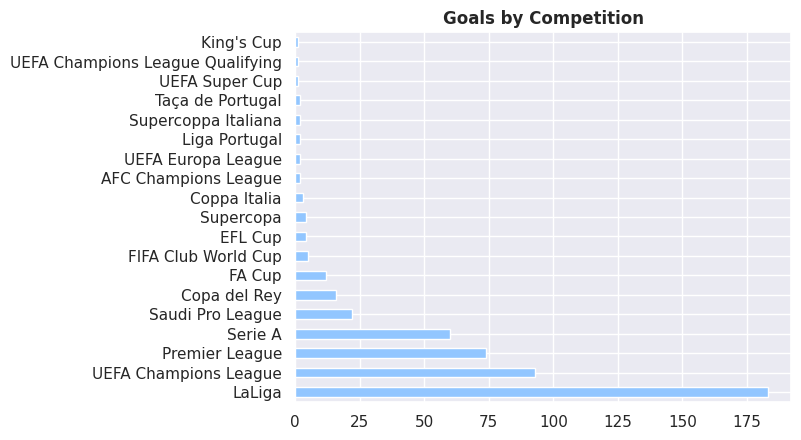

In [13]:
# Displaying goals scored by competition:
cr7.groupby('Date').first()['Competition'].value_counts().plot(kind = 'barh')
plt.ylabel(None)
plt.title('Goals by Competition', fontweight = 'bold')
plt.show()

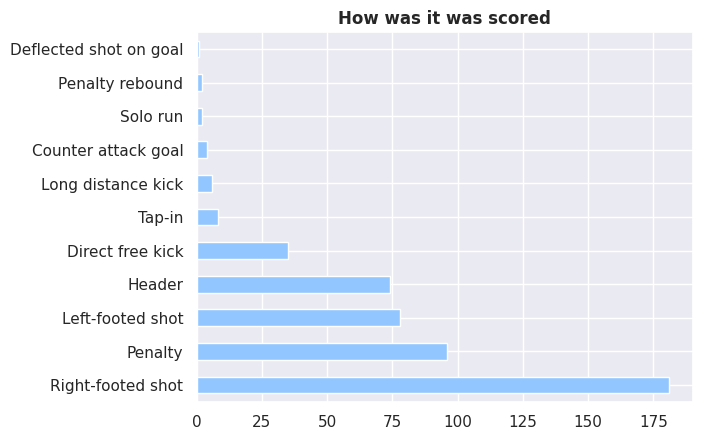

In [15]:
# Displaying goals scored by the way it was scored:
cr7.groupby('Date').first()['How was it scored'].value_counts().plot(kind = 'barh')
plt.ylabel(None)
plt.title('How was it was scored', fontweight = 'bold')
plt.show()

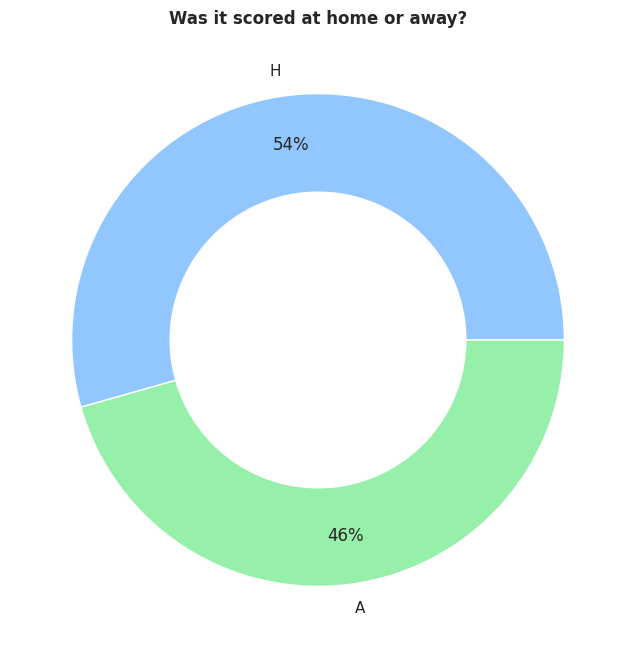

In [16]:
# Displaying goals scored by where it was scored (H or A):
cr7.groupby('Date').first()['Home or away'].value_counts().plot(kind = 'pie',
                                                              autopct = '%.0f%%',
                                                              figsize = (8, 8),
                                                              wedgeprops = dict(width = 0.4),
                                                              pctdistance = 0.8)
plt.ylabel(None)
plt.title('Was it scored at home or away?', fontweight = 'bold')
plt.show()

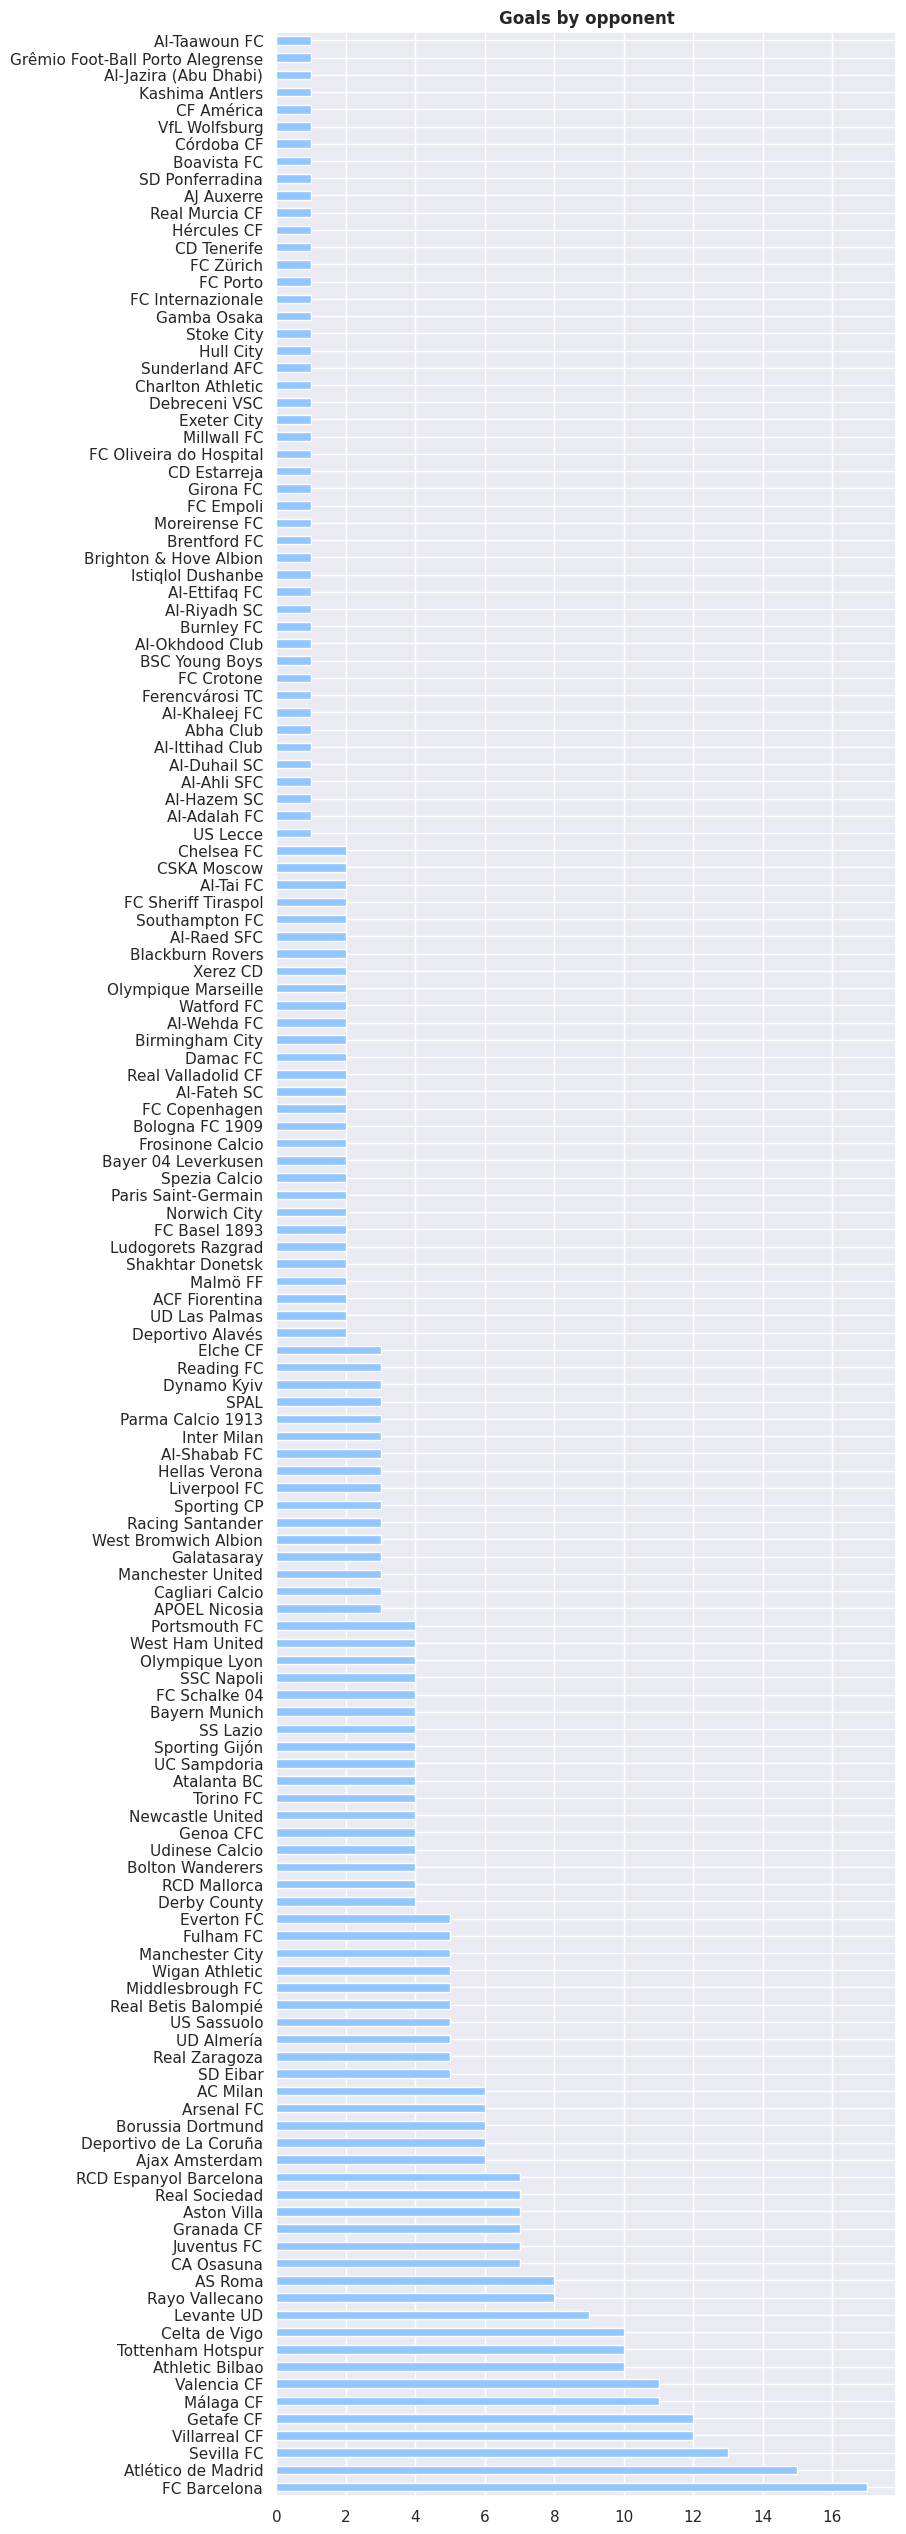

In [18]:
# Displaying goals scored by opponent:
cr7.groupby('Date').first()['Against who'].value_counts().plot(kind = 'barh', figsize = (8, 32))
plt.ylabel(None)
plt.title('Goals by opponent', fontweight = 'bold')
plt.show()

In [19]:
# Generating columns for day, month and year the goals were scored:
cr7['Date'] = cr7['Date'].map(pd.to_datetime)
cr7['Day'] = cr7['Date'].apply(lambda x : x.day)
cr7['Month'] = cr7['Date'].apply(lambda x : x.month)
cr7['Year'] = cr7['Date'].apply(lambda x : x.year)

print(cr7.head())

        Competition         Round       Date Home or away         Club  \
0     Liga Portugal             6 2002-10-07            H  Sporting CP   
1     Liga Portugal             6 2002-10-07            H  Sporting CP   
2     Liga Portugal             8 2002-10-26            A  Sporting CP   
3  Taça de Portugal  Fourth Round 2002-11-24            H  Sporting CP   
4  Taça de Portugal   Fifth Round 2002-12-18            H  Sporting CP   

               Against who Score Position Minute Which goal  \
0            Moreirense FC   3–0       LW    34'        2–0   
1            Moreirense FC   3–0       LW  90'+5        3–0   
2              Boavista FC   1–2       RW    88'        1–2   
3             CD Estarreja   4–1       RW    67'        3–1   
4  FC Oliveira do Hospital   8–1       RW    13'        3–0   

   How was it scored          Assist  Day  Month  Year  
0           Solo run             NaN    7     10  2002  
1             Header       Rui Jorge    7     10  2002  
2  Ri

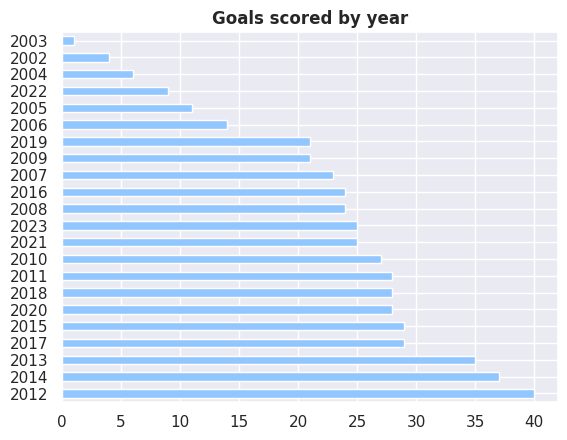

In [24]:
# Displaying goals scored by year:
cr7.groupby('Date').first()['Year'].value_counts().plot(kind = 'barh')
plt.ylabel(None)
plt.title('Goals scored by year', fontweight = 'bold')
plt.show()

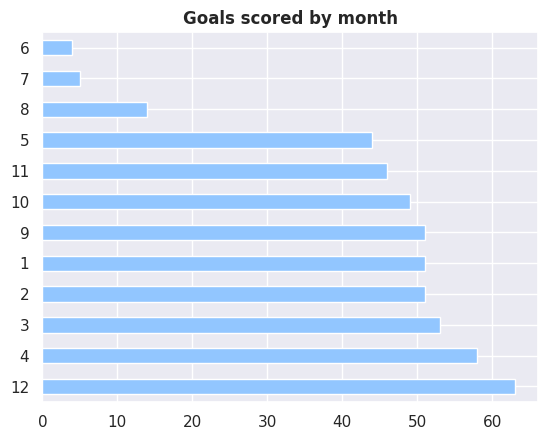

In [25]:
# Displaying goals scored by month:
cr7.groupby('Date').first()['Month'].value_counts().plot(kind = 'barh')
plt.ylabel(None)
plt.title('Goals scored by month', fontweight = 'bold')
plt.show()

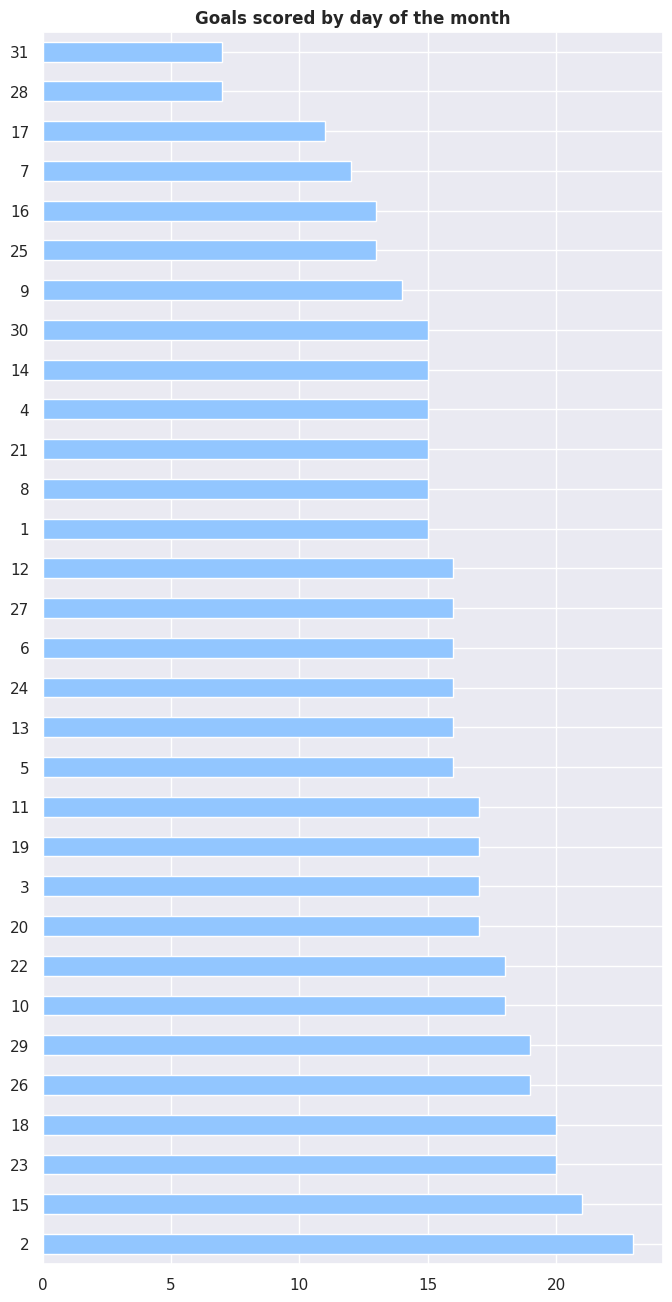

In [28]:
# Displaying goals scored by day of the month:
cr7.groupby('Date').first()['Day'].value_counts().plot(kind = 'barh', figsize = (8, 16))
plt.ylabel(None)
plt.title('Goals scored by day of the month', fontweight = 'bold')
plt.show()

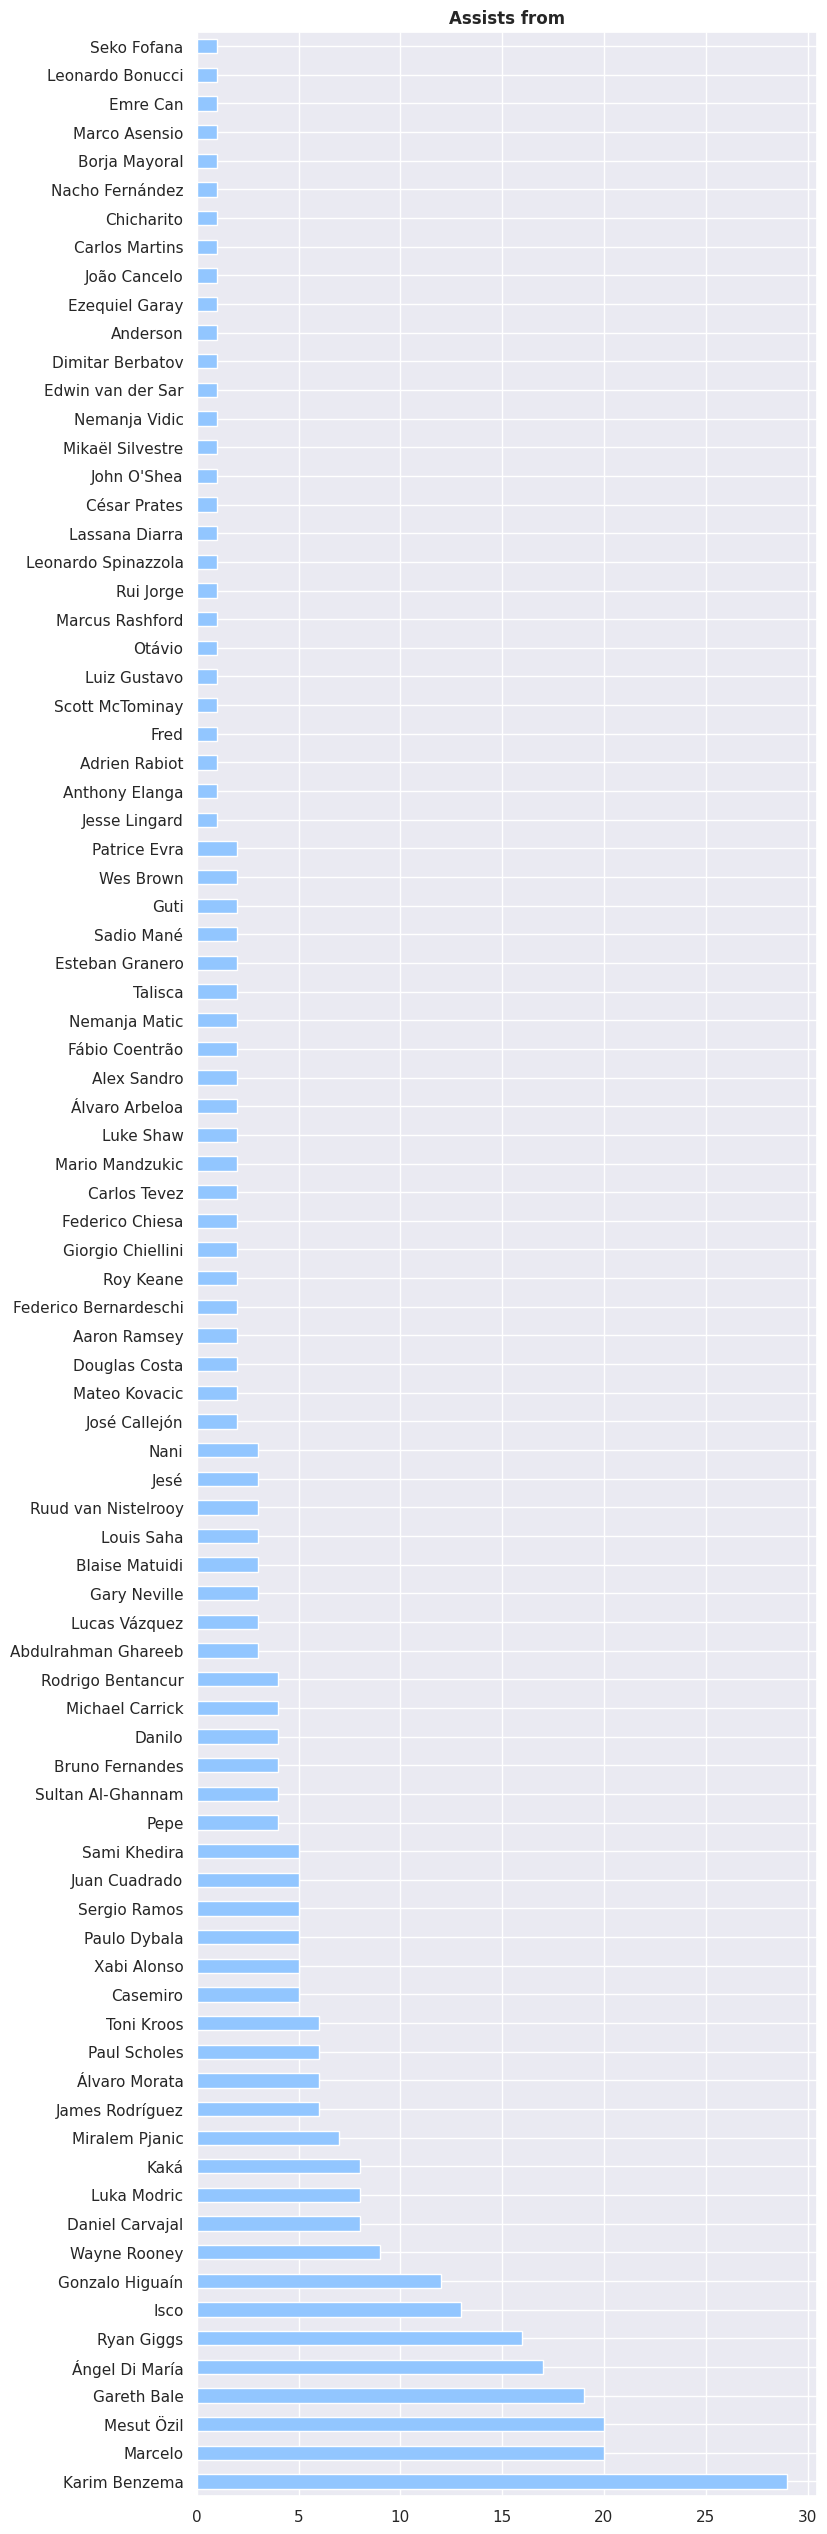

In [30]:
# Displaying who the assists came from
cr7.groupby('Date').first()['Assist'].value_counts().plot(kind = 'barh', figsize = (8, 32))
plt.ylabel(None)
plt.title('Assists from', fontweight = 'bold')
plt.show()

<Axes: xlabel='Month', ylabel='Year'>

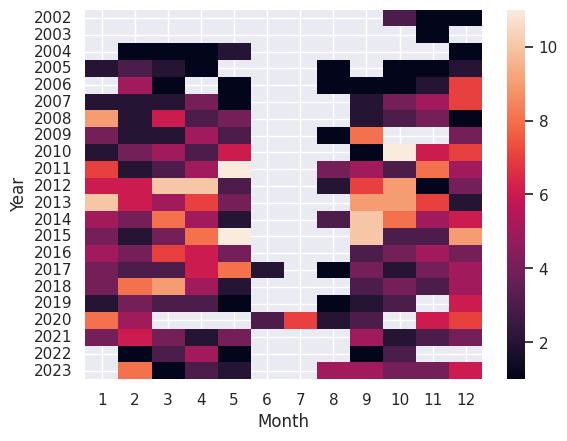

In [31]:
# Correlation of Year and Month with heatmap:
corr = cr7.groupby(['Year', 'Month']).apply(lambda x : len(x))
corr = corr.unstack()
sns.heatmap(corr, annot = False)

In [ ]:
def scored_in_first_or_second_half(timing):
  if timing < 45:
    result = 'First half'
  elif timing > 45 and timing < 90:
    result = 'Second half'
  else:
    result = 'Extra time'
  return result

cr7['First or Second Half'] = cr7['Minute'].apply(scored_in_first_or_second_half)
cr7.head(10)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
def result_type(location, score_h, score_a):
  if location == 'H' and score_h > score_a:
    result = 'Home win'
  elif location == 'H' and score_h < score_a:
    result = 'Home defeat'
  elif location == 'H' and score_h == score_a:
    result = 'Home draw'
  elif location == 'A' and score_a > score_h:
    result = 'Away win'
  elif location == 'A' and score_a < score_h:
    result = 'Away defeat'
  else:
    result = 'Away draw'
  return result

df['Result type'] = df[['Home or away', 'Score H', 'Score A']].apply(result_type)
df.head(10)

TypeError: ignored

In [ ]:
# Testing the method
def result_type(score_h, score_a):
  if score_h > score_a:
    result = 'Home win'
  elif score_h < score_a:
    result = 'Home defeat'
  elif score_h == score_a:
    result = 'Home draw'
  elif score_a > score_h:
    result = 'Away win'
  elif score_a < score_h:
    result = 'Away defeat'
  elif score_a == score_h:
    result = 'Away draw'
  return result

df['Result type'] = df[['Score H', 'Score A']].apply(result_type)
df.head(10)

TypeError: ignored

In [ ]:
df.groupby('Minute').first()['First or Second Half'].value_counts().plot(kind = 'pie',
                                                              autopct = '%.0f%%',
                                                              figsize = (8, 8),
                                                              wedgeprops = dict(width = 0.4),
                                                              pctdistance = 0.8)
plt.ylabel(None)
plt.title('Breakdown of goals by half', fontweight = 'bold')
plt.show()

KeyError: ignored

In [ ]:
# Adding Racing Bar animation for :
df.Date = pd.to_datetime(df.Date, format = '%Y')

In [ ]:
#Preparing a pivot table:
racing_bar_data = df.pivot_table(values = 'Against who', index = 'Date', columns = 'Competition')

<ipython-input-12-796136b4e6b4>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  racing_bar_data = df.pivot_table(values = 'Against who', index = 'Date', columns = 'Competition')


In [ ]:
# Checking if there are any null value in the pivot table:
racing_bar_data.columns[racing_bar_data.isnull().sum() == 0]

Index([], dtype='object', name='Competition')

In [ ]:
# Converting the data into a cumulative sum over several years:
racing_bar_filled = racing_bar_data.interpolate(method = 'linear').fillna(method = 'bfill')
racing_bar_filled = racing_bar_filled.cumsum()

In [ ]:
# Oversampling the dataset with interpolation (linear) for a smooth transition in the frames of the snimation:
racing_bar_filled = racing_bar_filled.resample('1D').interpolate(method = 'linear')[::7]

ValueError: ignored

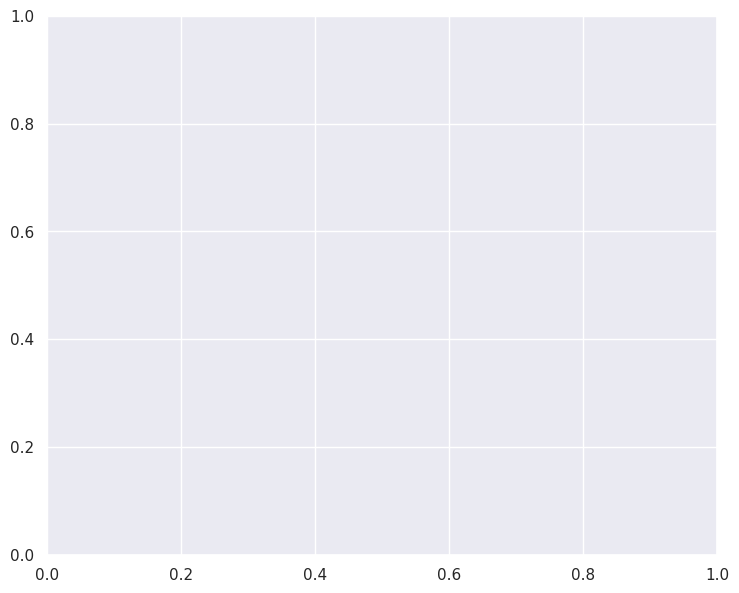

In [ ]:
# Creating and saving a Bar Chart Animation:
selected = racing_bar_filled.iloc[-1, :].sort_values(ascending = False)[:20].index
data = racing_bar_filled[selected].round()

fig, ax = plt.subplots(figsize = (9.3, 7))
fig.subplots_adjust(left = 0.18)

#Number of frames:
no_of_frames = data.shape[0]

# Initiating the barplot with the first rows of the dataframe:
bars = sns.barplot(y = data.columns, x = data.iloc[0, :], orient = 'h', ax = ax)
ax.set_xlim(0, 1500)
texts = [ax.text(0, i, 0, va = 'center') for i in range(data.shape[1])]
title_text = ax.text(650, -1, 'Date: ', fontsize = 12)
ax.set_xlabel(' ')
ax.set_ylabel(None)

def animate(i):
  y = data.iloc[i, :]

  # Updating the title of the barplot axis:
  title_text.set_text(f'Date: {str(data.index[i].date())}')

  # updating elements in both plots:
  for j, b, in enumerate(bars.patches):
    # updating each bar's height:
    b.set_width(y[j])

    # updating text for each bar (optional)
    texts[j].set_text(f'${y[j].astype(int)}M')
    texts[j].set_x(y[j])

animation = FuncAnimation(fig, animate, repeat = False,
                          frames = no_of_frames,
                          interval = 1, blit = False)
animation.save('goals.gif', writer = 'imagemagick', fps = 120)
plt.close(fig)